In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.3f}'.format
# Read in data from CSV
avo_data = pd.read_csv('avocado.csv')
avo_data['month'] = pd.DatetimeIndex(avo_data['Date']).month
# Get first 5 rows of the dataset
avo_data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0,2015-12-27,1.330,64236.620,1036.740,54454.850,48.160,8696.870,8603.620,93.250,0.000,conventional,2015,Albany,12
1,1,2015-12-20,1.350,54876.980,674.280,44638.810,58.330,9505.560,9408.070,97.490,0.000,conventional,2015,Albany,12
2,2,2015-12-13,0.930,118220.220,794.700,109149.670,130.500,8145.350,8042.210,103.140,0.000,conventional,2015,Albany,12
3,3,2015-12-06,1.080,78992.150,1132.000,71976.410,72.580,5811.160,5677.400,133.760,0.000,conventional,2015,Albany,12
4,4,2015-11-29,1.280,51039.600,941.480,43838.390,75.780,6183.950,5986.260,197.690,0.000,conventional,2015,Albany,11


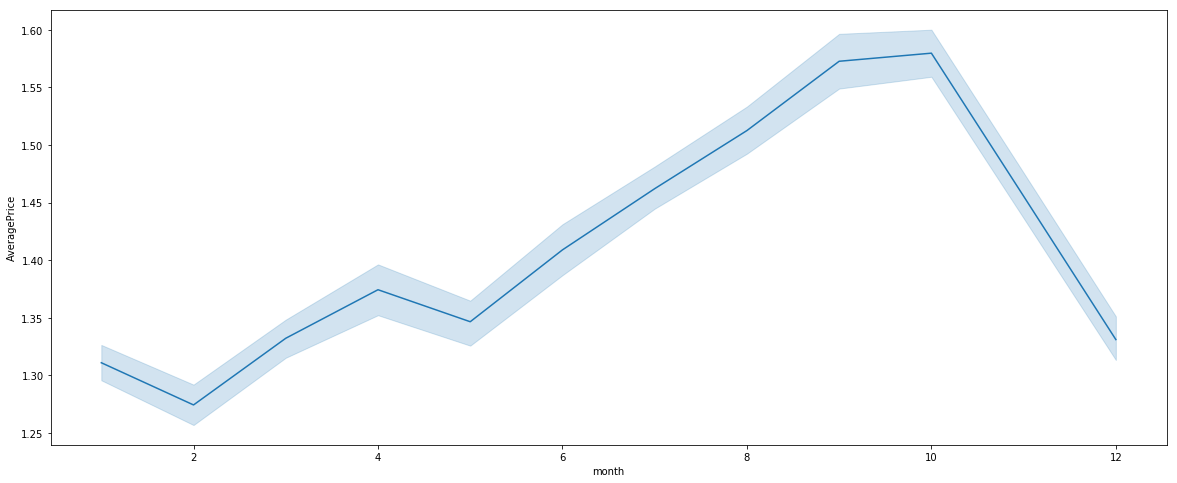

In [16]:
# What is the best month of the year to buy avocados? 
plt.figure(figsize=(20,8))
ax = sns.lineplot(x="month", y="AveragePrice", data=avo_data)
plt.show()

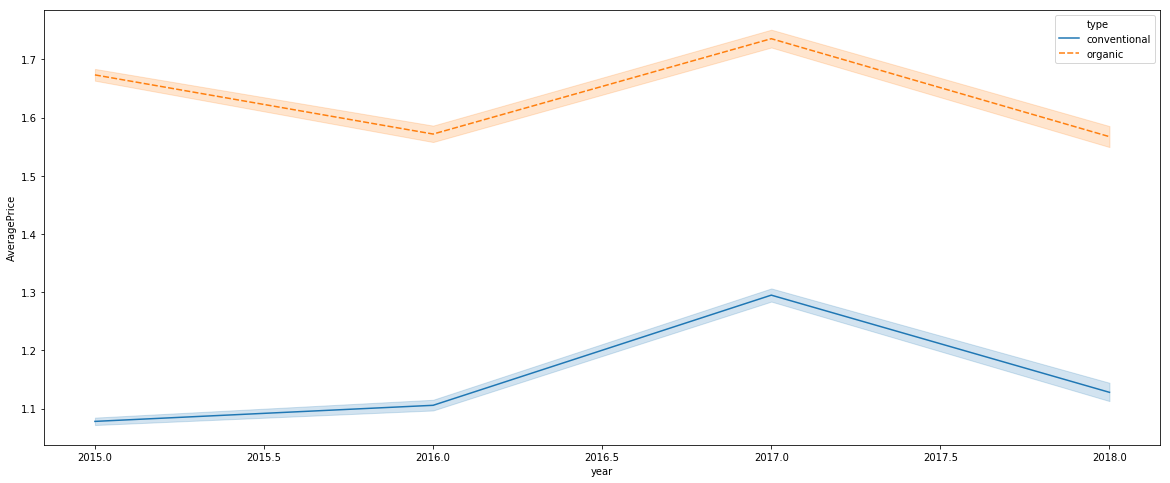

In [13]:
# What is the Price over time for organic vs conventional Avocados? 
plt.figure(figsize=(20,8))
ax = sns.lineplot(x="year", y="AveragePrice", hue="type", style="type", data=avo_data)
plt.show()

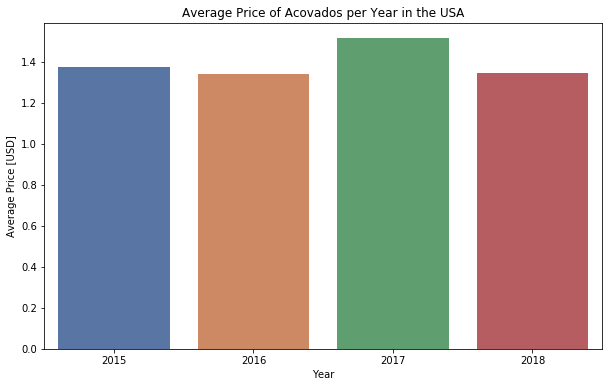

In [15]:
# What is the average price of avocados per year? 
avg_price_year = avo_data.groupby('year')['AveragePrice'].mean()
df = avg_price_year.to_frame()
df = df.reset_index()
df = df.sort_values(by=['AveragePrice'])

# Format the plot to display 
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df["year"], y=df["AveragePrice"], palette="deep")
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Average Price [USD]')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Average Price of Acovados per Year in the USA')
plt.show()

In [12]:
# What is the Volume over time for organic vs conventional Avocados? (example of GroupBy)
vols = avo_data.groupby(['type', 'year'])['Total Volume'].mean()
vols

type          year
conventional  2015   1530127.933
              2016   1670316.885
              2017   1665326.972
              2018   2058959.983
organic       2015     31659.931
              2016     46524.245
              2017     58790.177
              2018     74895.480
Name: Total Volume, dtype: float64

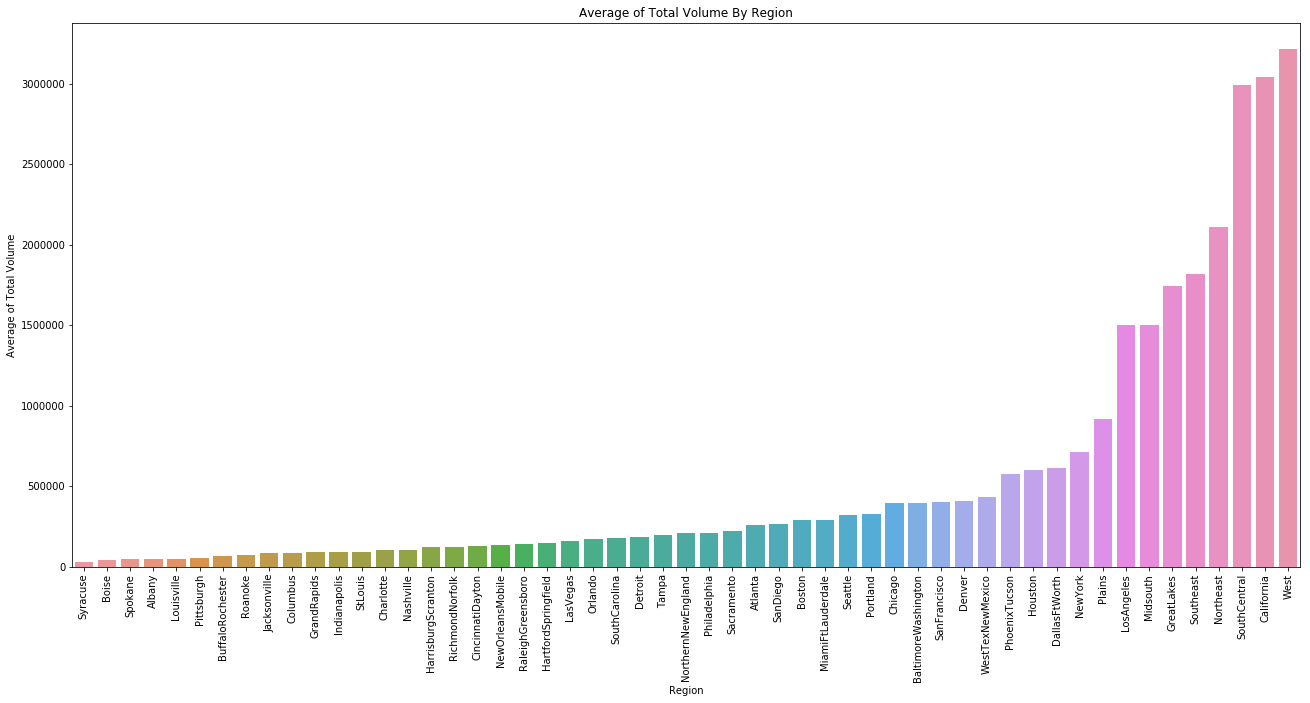

In [2]:
# Which region buys the largest amount of avocados?
avg_volume = avo_data.groupby(["region"])["Total Volume"].mean()
df = avg_volume.to_frame()
df = df.reset_index()
df = df[df.region!='TotalUS']
df = df.sort_values(by=['Total Volume'])

# Format plot to display
plt.figure(figsize=(22,10))
ax = sns.barplot(x=df["region"], y=df["Total Volume"])
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Average of Total Volume By Region')
plt.show()

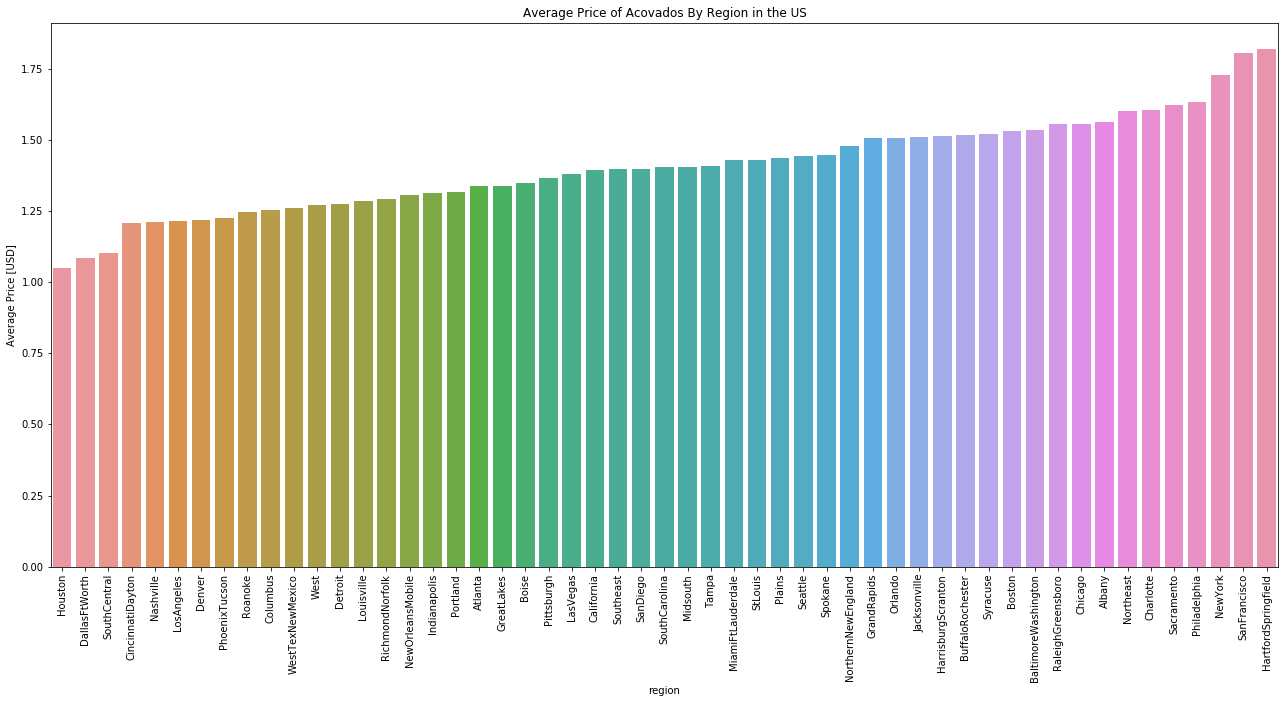

In [11]:
# What is the average price of avocados per region?
# avo_data.dtypes
# avo_data.describe()

# Dataframe to determine average price 
avg_price_regions = avo_data.groupby('region')['AveragePrice'].mean()
df = avg_price_regions.to_frame()
df = df.reset_index()
df = df[df.region!='TotalUS']
df = df.sort_values(by=['AveragePrice'])

# Format the plot to display 
plt.figure(figsize=(22,10))
ax = sns.barplot(x=df["region"], y=df["AveragePrice"])
plt.xticks(rotation=90)
plt.xlabel('region')
plt.ylabel('Average Price [USD]')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Average Price of Acovados By Region in the US')
plt.show()

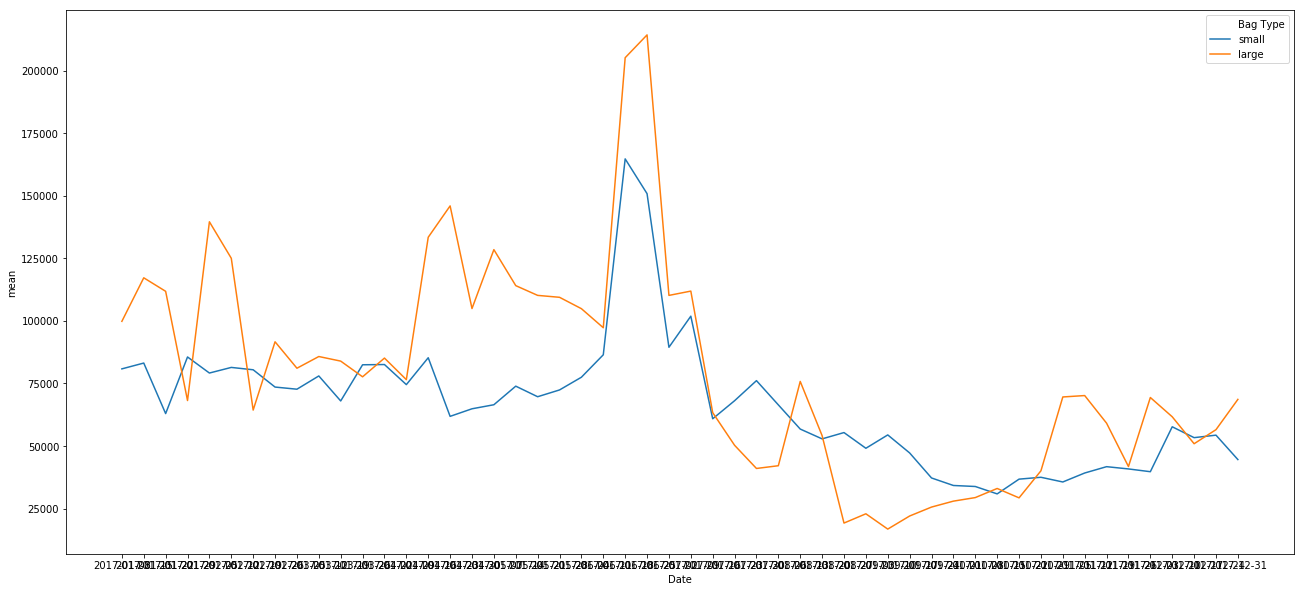

In [3]:
# Is there a certain time of year where people are more inclined to buy small vs large bags
avg_bag_small = avo_data.groupby(["region", "Date"]).agg({"Small Bags": ['mean']})
df = avg_bag_small.reset_index()
df = df.rename(columns={"Small Bags": "volume"})
df["Bag Type"] = "small"
avg_bag_large = avo_data.groupby(["region", "Date"]).agg({"Large Bags": ['mean']})
df1 = avg_bag_large.reset_index()
df1 = df1.rename(columns={"Large Bags": "volume"})
df1["Bag Type"] = "large"
plot_data = pd.concat([df, df1])
plot_data = plot_data[(plot_data.Date < '2018-01-01') & (plot_data.Date > '2017-01-01')]
west_tex_region = plot_data[plot_data.region == 'WestTexNewMexico']

plt.figure(figsize=(22,10))
ax = sns.lineplot(x=west_tex_region["Date"], y=west_tex_region['volume']['mean'], hue=west_tex_region['Bag Type'])
plt.show()


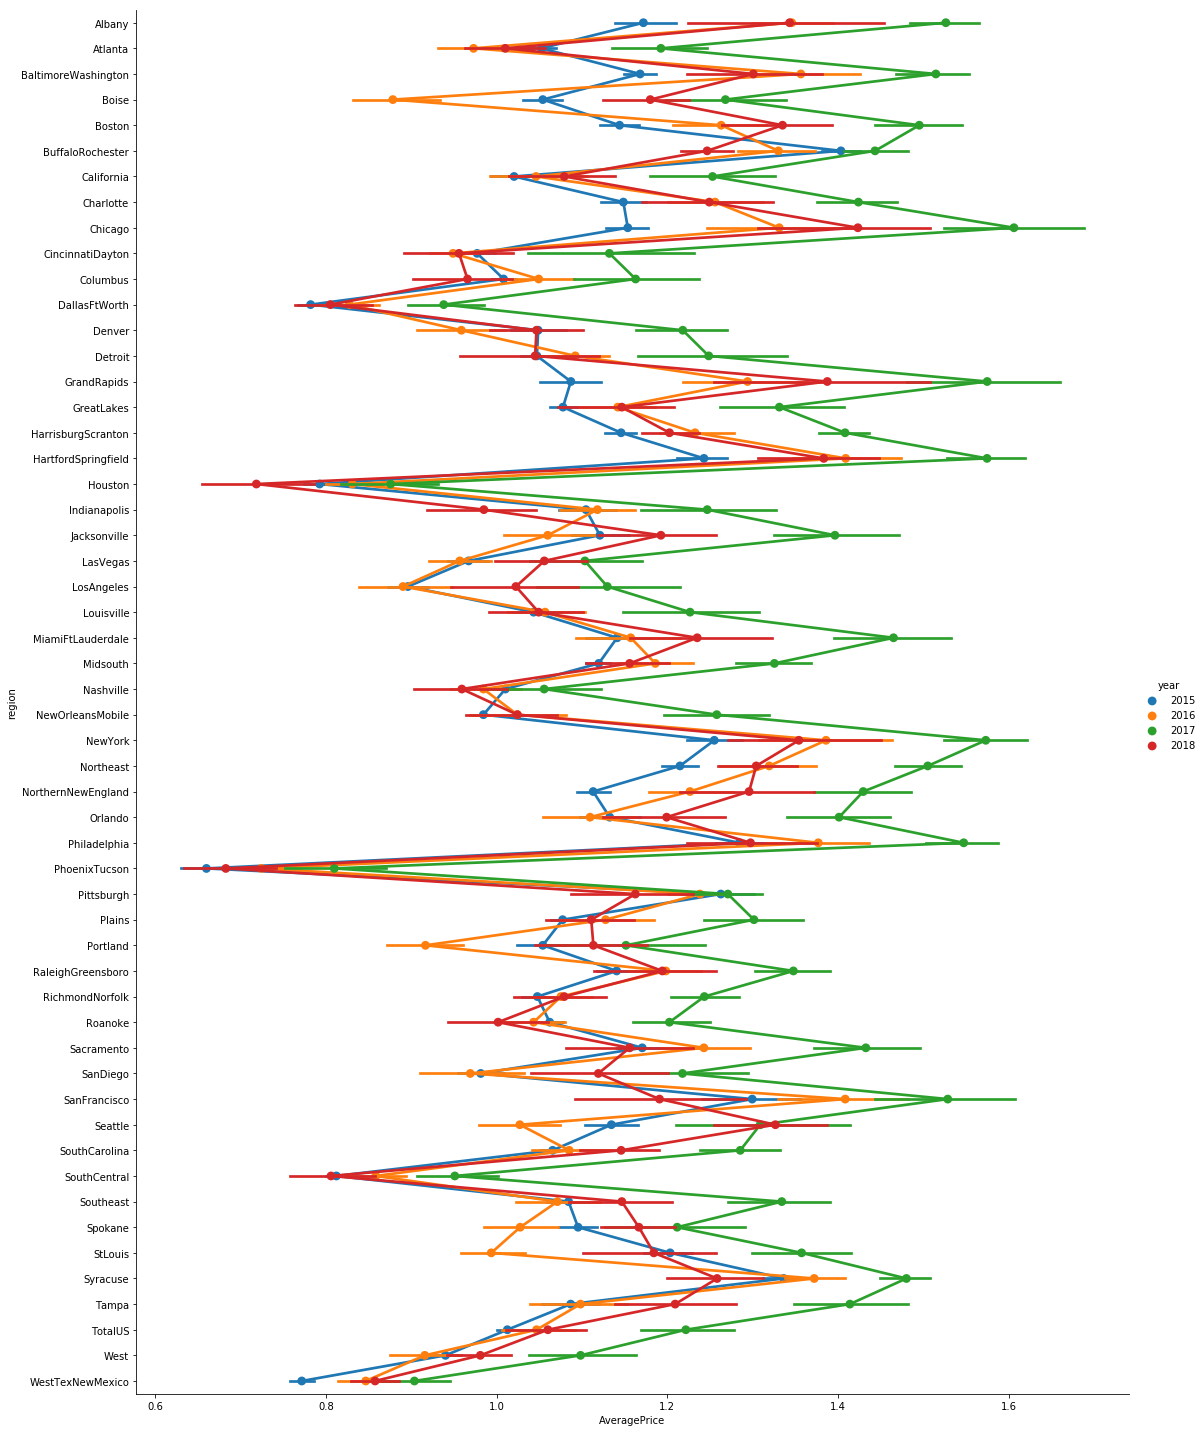

In [3]:
ax = sns.catplot('AveragePrice','region',data=avo_data[avo_data.type == 'conventional'],
                   hue='year',
                   height=20,
                   aspect=0.8,
                   kind='point'
              )
plt.show()

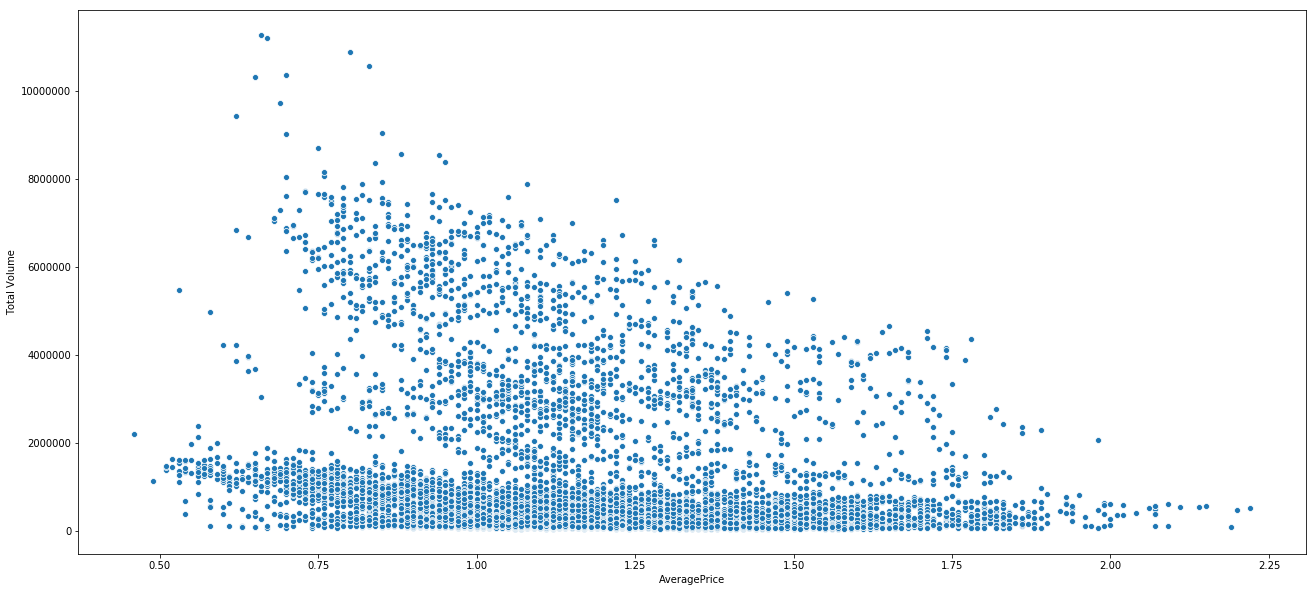

In [4]:
# Do people buy a larger volume of avocados when the prices are lower?
# Relation between Price and Volume
df = avo_data[(avo_data.region !='TotalUS') & (avo_data.type == 'conventional')]
plt.figure(figsize=(22,10))
plt.ticklabel_format(style='plain', axis='y')
ax = sns.scatterplot(x='AveragePrice', y='Total Volume', data=df)
plt.show()

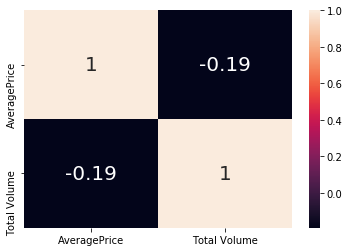

In [5]:
# Make a Correlation Matrix to see relation between
cols = ['AveragePrice','Total Volume']
correlation_matrix = np.corrcoef(avo_data[cols].values.T)
hm = sns.heatmap(correlation_matrix, annot = True, annot_kws = {'size':20}, yticklabels = cols, xticklabels = cols)
plt.show()

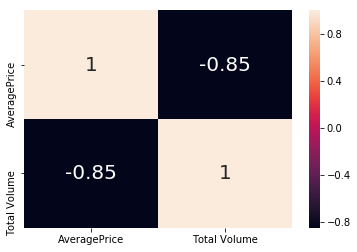

In [6]:
# Show that region as a factor gives us a strong correlation value between average and total volume
filter_data = avo_data[avo_data.region == 'WestTexNewMexico']
cols = ['AveragePrice','Total Volume']
correlation_matrix = np.corrcoef(filter_data[cols].values.T)
hm = sns.heatmap(correlation_matrix, annot = True, annot_kws = {'size':20}, yticklabels = cols, xticklabels = cols)
plt.show()